In [86]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
import numpy as np
import matplotlib.pyplot as plt

### Loading & Visualisation Data

In [87]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [88]:
x_train.shape , y_train.shape 

((50000, 32, 32, 3), (50000, 1))

In [89]:
x_test.shape , y_test.shape 

((10000, 32, 32, 3), (10000, 1))

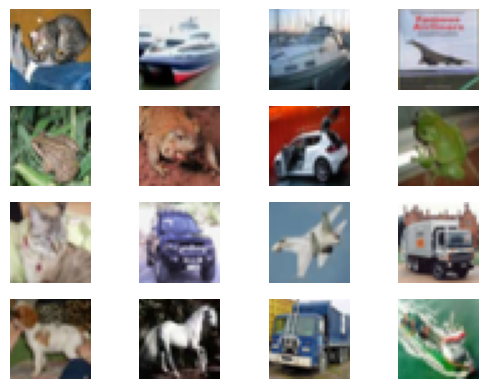

In [90]:
for i, image in enumerate(x_test[:16]):
    plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.axis("off")

### Data Preprocessing

In [91]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Model Preparation

In [92]:
_, HEIGHT,WIDTH,CHANNELS = x_train.shape
print(HEIGHT, WIDTH, CHANNELS)

32 32 3


In [93]:
model=Sequential([
    InputLayer(shape=(HEIGHT,WIDTH,CHANNELS)),
    
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="softmax")
])

In [94]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,649 (1.36 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
tf.keras.utils.plot_model(model, "model.png",True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [96]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [97]:
# import os
# os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"

In [98]:
history = model.fit(x_train,y_train,batch_size=32,epochs=100,verbose=1)

Epoch 1/100


/home/sib/DLCV/.deep/lib/python3.10/site-packages/keras/src/ops/nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1000 - loss: nan
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1008 - loss: nan
Epoch 3/100
 654/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0967 - loss: nan

KeyboardInterrupt: 